<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/IMP_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [83]:
# Charger le fichier Excel
file_path = 'Concrete_Data.xls'  # Remplacez par le chemin de votre fichier
data = pd.read_excel(file_path)

# Renommer les colonnes
new_column_names = {
   'Cement (component 1)(kg in a m^3 mixture)': 'Cement (kg/m³)',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Slag (kg/m³)',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'FlyAsh (kg/m³)',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water (kg/m³)',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer (kg/m³)',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'CoarseAggr (kg/m³)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'FineAggr (kg/m³)',
    'Age (day)': 'Age (day)',
    'Concrete compressive strength(MPa, megapascals) ': 'Strength (MPa)'
}

data.rename(columns=new_column_names, inplace=True)

In [84]:
data

Cement (kg/m³)  Slag (kg/m³)  FlyAsh (kg/m³)  Water (kg/m³)  \
0              540.0           0.0             0.0          162.0   
1              540.0           0.0             0.0          162.0   
2              332.5         142.5             0.0          228.0   
3              332.5         142.5             0.0          228.0   
4              198.6         132.4             0.0          192.0   
...              ...           ...             ...            ...   
1025           276.4         116.0            90.3          179.6   
1026           322.2           0.0           115.6          196.0   
1027           148.5         139.4           108.6          192.7   
1028           159.1         186.7             0.0          175.6   
1029           260.9         100.5            78.3          200.6   

      Superplasticizer (kg/m³)  CoarseAggr (kg/m³)  FineAggr (kg/m³)  \
0                          2.5              1040.0             676.0   
1                          2.5              1055.0             676.0   
2                          0.0               932.0             594.0   
3                          0.0               932.0             594.0   
4                          0.0               978.4             825.5   
...                        ...                 ...               ...   
1025                       8.9               870.1             768.3   
1026                      10.4               817.9             813.4   
1027                       6.1               892.4             780.0   
1028                      11.3               989.6             788.9   
1029                       8.6               864.5             761.5   

      Age (day)  Strength (MPa)  
0            28       79.986111  
1            28       61.887366  
2           270       40.269535  
3           365       41.052780  
4           360       44.296075  
...         ...             ...  
1025         28       44.284354  
1026         28       31.178794  
1027         28       23.696601  
1028         28       32.768036  
1029         28       32.401235  

[1030 rows x 9 columns]

# **Data_Description**

In [ ]:
data.shape

(1030, 9)

In [ ]:
data.dtypes

Cement (kg/m³)              float64
Slag (kg/m³)                float64
FlyAsh (kg/m³)              float64
Water (kg/m³)               float64
Superplasticizer (kg/m³)    float64
CoarseAggr (kg/m³)          float64
FineAggr (kg/m³)            float64
Age (day)                     int64
Strength (MPa)              float64
dtype: object

In [ ]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(data, diag_kind='kde')

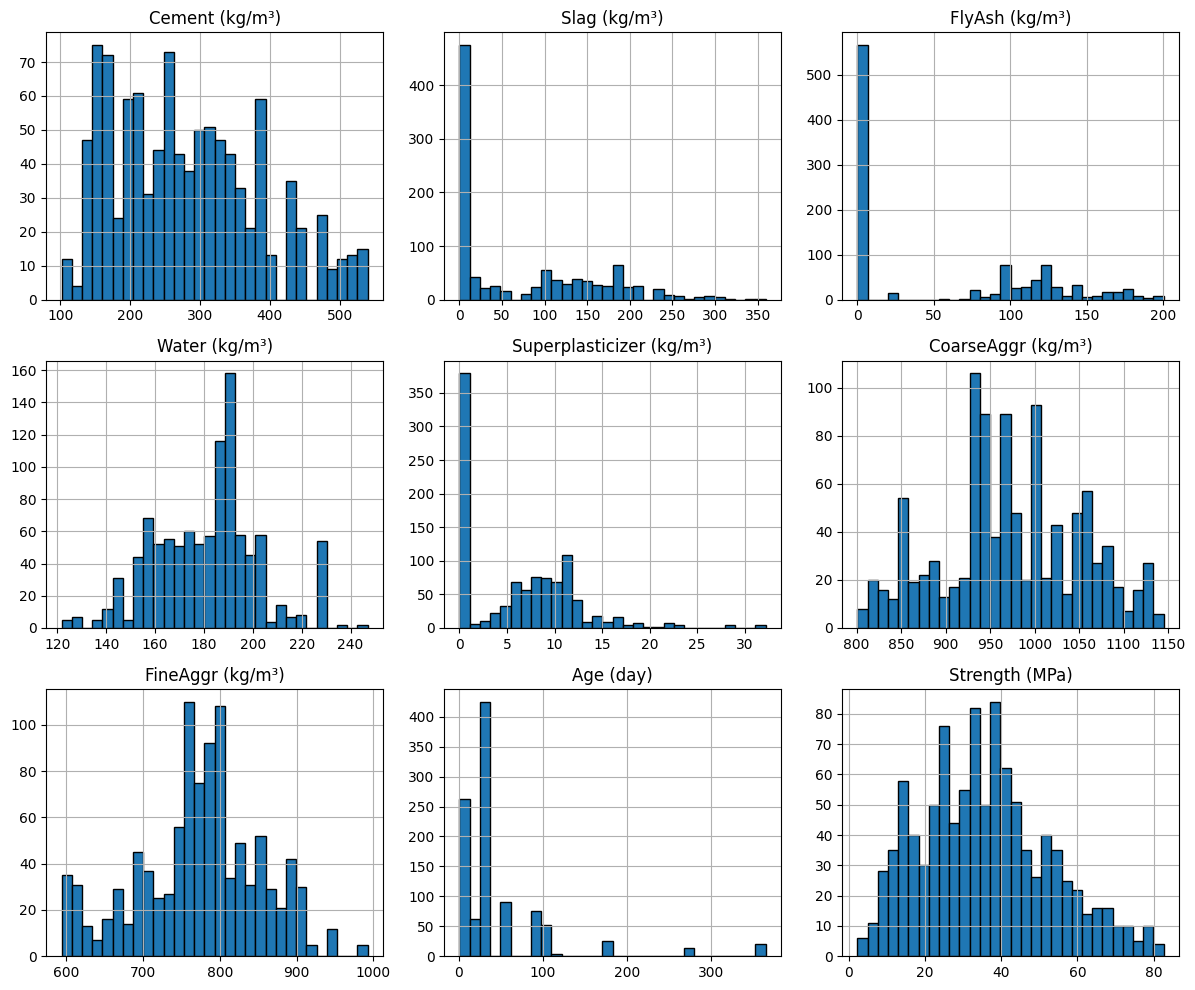

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogrammes
data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Visualiser la variation de chaque variable avec des histogrammes et des KDE plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


In [ ]:
data.describe().T

count        mean         std         min  \
Cement (kg/m³)            1030.0  281.165631  104.507142  102.000000   
Slag (kg/m³)              1030.0   73.895485   86.279104    0.000000   
FlyAsh (kg/m³)            1030.0   54.187136   63.996469    0.000000   
Water (kg/m³)             1030.0  181.566359   21.355567  121.750000   
Superplasticizer (kg/m³)  1030.0    6.203112    5.973492    0.000000   
CoarseAggr (kg/m³)        1030.0  972.918592   77.753818  801.000000   
FineAggr (kg/m³)          1030.0  773.578883   80.175427  594.000000   
Age (day)                 1030.0   45.662136   63.169912    1.000000   
Strength (MPa)            1030.0   35.817836   16.705679    2.331808   

                                 25%         50%          75%          max  
Cement (kg/m³)            192.375000  272.900000   350.000000   540.000000  
Slag (kg/m³)                0.000000   22.000000   142.950000   359.400000  
FlyAsh (kg/m³)              0.000000    0.000000   118.270000   200.100000  
Water (kg/m³)             164.900000  185.000000   192.000000   247.000000  
Superplasticizer (kg/m³)    0.000000    6.350000    10.160000    32.200000  
CoarseAggr (kg/m³)        932.000000  968.000000  1029.400000  1145.000000  
FineAggr (kg/m³)          730.950000  779.510000   824.000000   992.600000  
Age (day)                   7.000000   28.000000    56.000000   365.000000  
Strength (MPa)             23.707115   34.442774    46.136287    82.599225

In [ ]:
plt.figure(figsize=(35,15))

sns.heatmap(data.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

ValueError: could not convert string to float: '>50'

<Figure size 3500x1500 with 0 Axes>

In [ ]:
#Checking for missing values

data.isnull().sum()

Cement (kg/m³)              0
Slag (kg/m³)                0
FlyAsh (kg/m³)              0
Water (kg/m³)               0
Superplasticizer (kg/m³)    0
CoarseAggr (kg/m³)          0
FineAggr (kg/m³)            0
Age (day)                   0
Strength (MPa)              0
dtype: int64

Checking outliers
1. Box Plot
2. Z-Score Method
3. IQR Method


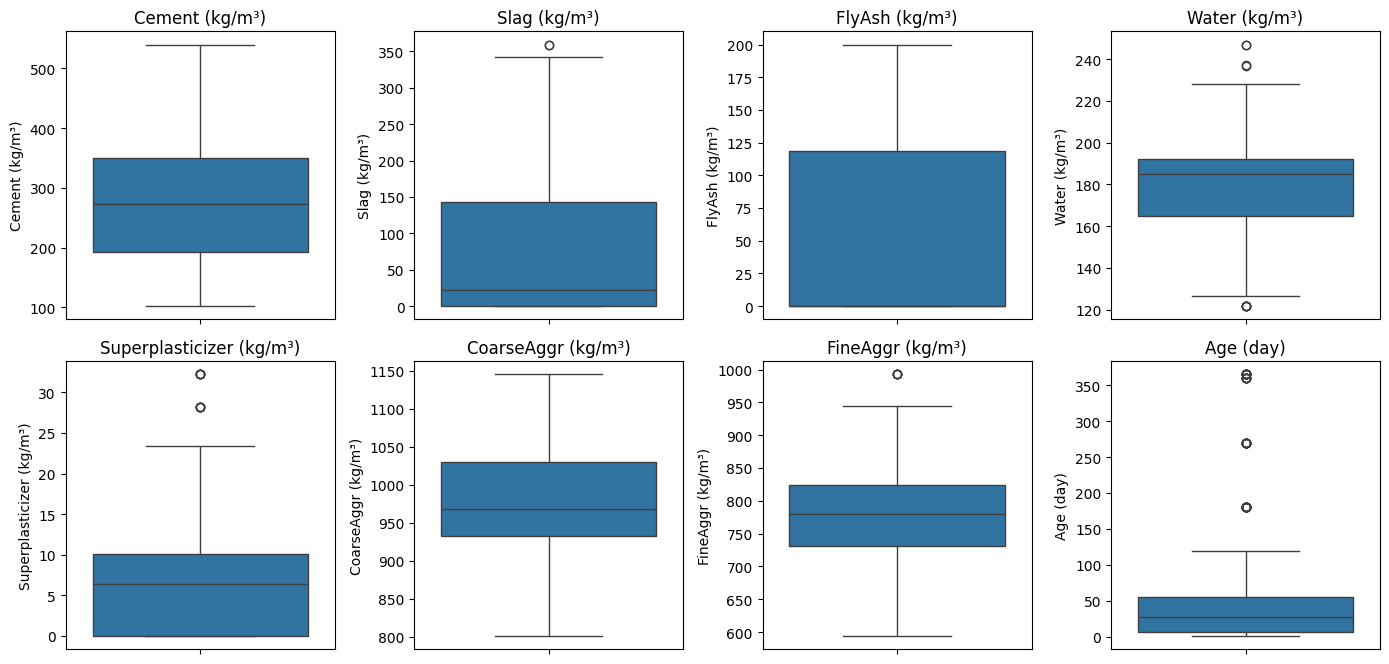

In [ ]:
#1. Box Plot
# Plot box plots for each feature
plt.figure(figsize=(14, 10))
for i, column in enumerate(data.columns[:-1]):  # Exclude the target column 'Strength (MPa)'
    plt.subplot(3, 4, i + 1)  # Adjust the number of rows and columns based on the number of features
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
# Sélectionner les colonnes pour le boxplot
columns_to_plot = ['Cement (kg/m³)', 'Slag (kg/m³)', 'FlyAsh (kg/m³)', 'Water (kg/m³)',
                   'Superplasticizer (kg/m³)', 'CoarseAggr (kg/m³)', 'FineAggr (kg/m³)',
                   'Age (day)', 'Strength (MPa)',]

# Tracer le boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[columns_to_plot])
plt.xticks(rotation=45)
plt.title('Boxplot of Concrete Data Parameters')
plt.grid(True)
plt.show()

In [ ]:
from scipy import stats
#2.Z-Score Method

# Calculer les Z-scores
z_scores = np.abs(stats.zscore(data.drop(columns='Strength (MPa)')))  # Exclure la colonne cible

# Définir un seuil pour identifier les outliers
threshold = 3

# Identifier les outliers pour chaque caractéristique
outliers = (z_scores > threshold).astype(int)  # Convertir en entier pour faciliter le comptage

# Compter le nombre d'outliers pour chaque caractéristique
outliers_count = np.sum(outliers, axis=0)

# Afficher le nombre d'outliers pour chaque caractéristique
for column, count in zip(data.columns[:-1], outliers_count):  # Exclure la colonne cible
    print(f"{column}: {count} outliers")



Cement (kg/m³): 0 outliers
Slag (kg/m³): 4 outliers
FlyAsh (kg/m³): 0 outliers
Water (kg/m³): 2 outliers
Superplasticizer (kg/m³): 10 outliers
CoarseAggr (kg/m³): 0 outliers
FineAggr (kg/m³): 0 outliers
Age (day): 33 outliers


In [ ]:
#3. IQR Method
# Calculer l'IQR pour chaque caractéristique
Q1 = data.drop(columns='Strength (MPa)').quantile(0.25)
Q3 = data.drop(columns='Strength (MPa)').quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers pour chaque caractéristique
outliers = ((data.drop(columns='Strength (MPa)') < lower_bound) | (data.drop(columns='Strength (MPa)') > upper_bound))

# Compter le nombre d'outliers pour chaque caractéristique
outliers_count = outliers.sum()

# Afficher le nombre d'outliers pour chaque caractéristique
for column, count in outliers_count.items():
    print(f"{column}: {count} outliers")



Cement (kg/m³): 0 outliers
Slag (kg/m³): 2 outliers
FlyAsh (kg/m³): 0 outliers
Water (kg/m³): 9 outliers
Superplasticizer (kg/m³): 10 outliers
CoarseAggr (kg/m³): 0 outliers
FineAggr (kg/m³): 5 outliers
Age (day): 59 outliers


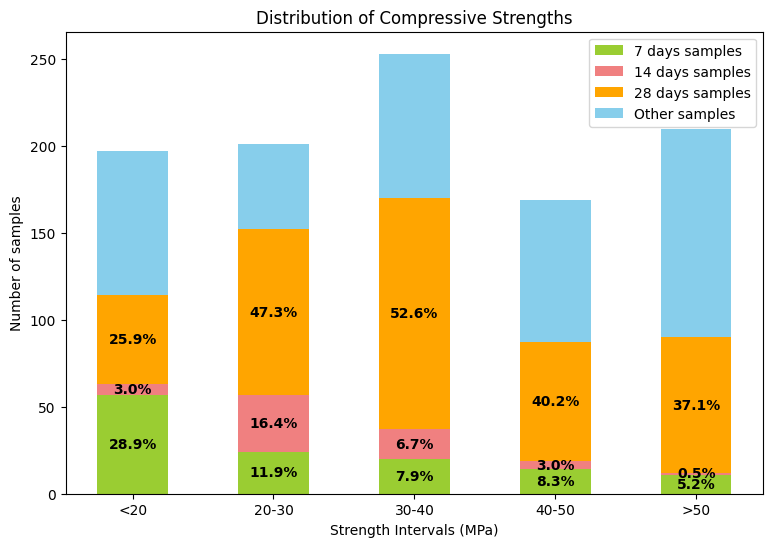

In [ ]:
# Définir les intervalles de résistance
bins = [0, 20, 30, 40, 50, float('inf')]

# Calculer l'histogramme des échantillons par intervalle de résistance
data['Strength Interval'] = pd.cut(data['Strength (MPa)'], bins=bins, labels=['<20', '20-30', '30-40', '40-50', '>50'])

# Calculer le nombre d'échantillons pour chaque intervalle
interval_counts = data['Strength Interval'].value_counts().sort_index()

# Calculer le nombre d'échantillons de 7 jours, 14 jours, et 28 jours pour chaque intervalle
age_7_counts = data[data['Age (day)'] == 7]['Strength Interval'].value_counts().sort_index()
age_14_counts = data[data['Age (day)'] == 14]['Strength Interval'].value_counts().sort_index()
age_28_counts = data[data['Age (day)'] == 28]['Strength Interval'].value_counts().sort_index()

# Calculer le nombre d'échantillons autres que 7 jours, 14 jours et 28 jours pour chaque intervalle
other_counts = interval_counts - age_7_counts - age_14_counts - age_28_counts

# Tracer l'histogramme empilé
fig, ax = plt.subplots(figsize=(9, 6))

bar_width = 0.5

# Barres pour les échantillons de 7 jours
bar1 = ax.bar(interval_counts.index, age_7_counts, bar_width, label='7 days samples', color='yellowgreen')

# Barres pour les échantillons de 14 jours
bar2 = ax.bar(interval_counts.index, age_14_counts, bar_width, bottom=age_7_counts, label='14 days samples', color='lightcoral')

# Barres pour les échantillons de 28 jours
bar3 = ax.bar(interval_counts.index, age_28_counts, bar_width, bottom=age_7_counts + age_14_counts, label='28 days samples', color='orange')

# Barres pour les autres échantillons
bar4 = ax.bar(interval_counts.index, other_counts, bar_width, bottom=age_7_counts + age_14_counts + age_28_counts, label='Other samples', color='skyblue')

ax.set_xlabel('Strength Intervals (MPa)')
ax.set_ylabel('Number of samples')
ax.set_title('Distribution of Compressive Strengths')
ax.legend()

# Ajouter les annotations pour les pourcentages d'échantillons de 7, 14, et 28 jours
for i, (count_7, count_14, count_28, total_count) in enumerate(zip(age_7_counts, age_14_counts, age_28_counts, interval_counts)):
    if total_count > 0:
        percentage_7 = (count_7 / total_count) * 100
        percentage_14 = (count_14 / total_count) * 100
        percentage_28 = (count_28 / total_count) * 100
        ax.text(i, count_7 / 2, f'{percentage_7:.1f}%', ha='center', va='center', color='black', fontweight='bold')
        ax.text(i, count_7 + count_14 / 2, f'{percentage_14:.1f}%', ha='center', va='center', color='black', fontweight='bold')
        ax.text(i, count_7 + count_14 + count_28 / 2, f'{percentage_28:.1f}%', ha='center', va='center', color='black', fontweight='bold')

plt.show()

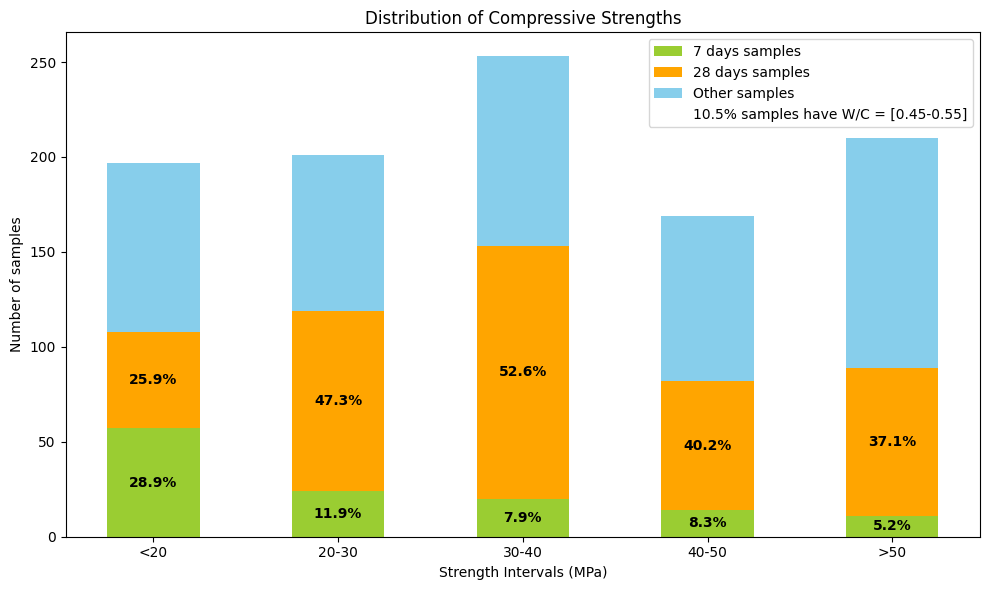

In [ ]:
# Calculer le rapport eau/ciment
data2['Water/Cement Ratio'] = data2['Water (kg/m³)'] / data2['Cement (kg/m³)']

# Définir les intervalles de résistance
bins = [0, 20, 30, 40, 50, float('inf')]

# Calculer l'histogramme des échantillons par intervalle de résistance
data2['Strength Interval'] = pd.cut(data2['Strength (MPa)'], bins=bins, labels=['<20', '20-30', '30-40', '40-50', '>50'])

# Calculer le nombre d'échantillons pour chaque intervalle
interval_counts = data2['Strength Interval'].value_counts().sort_index()

# Calculer le nombre d'échantillons de 7 jours et 28 jours pour chaque intervalle
age_7_counts = data2[data2['Age (day)'] == 7]['Strength Interval'].value_counts().sort_index()
age_28_counts = data2[data2['Age (day)'] == 28]['Strength Interval'].value_counts().sort_index()

# Calculer le nombre d'échantillons autres que 7 jours et 28 jours pour chaque intervalle
other_counts = interval_counts - age_7_counts - age_28_counts

# Calculer le pourcentage des échantillons avec un rapport eau-ciment entre 0,45 et 0,55 pour chaque intervalle
ratio_filtered = data2[(data2['Water/Cement Ratio'] >= 0.45) & (data2['Water/Cement Ratio'] <= 0.55)]
ratio_counts = ratio_filtered['Strength Interval'].value_counts().reindex(interval_counts.index, fill_value=0)

# Calculer le pourcentage global des échantillons avec un rapport eau-ciment entre 0,45 et 0,55
total_samples = len(data2)
filtered_samples = len(ratio_filtered)
percentage_ratio_global = (filtered_samples / total_samples) * 100

# Tracer l'histogramme empilé
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.5

# Barres pour les échantillons de 7 jours
bar1 = ax.bar(interval_counts.index, age_7_counts, bar_width, label='7 days samples', color='yellowgreen')

# Barres pour les échantillons de 28 jours
bar2 = ax.bar(interval_counts.index, age_28_counts, bar_width, bottom=age_7_counts, label='28 days samples', color='orange')

# Barres pour les autres échantillons
bar3 = ax.bar(interval_counts.index, other_counts, bar_width, bottom=age_7_counts + age_28_counts, label='Other samples', color='skyblue')

ax.set_xlabel('Strength Intervals (MPa)')
ax.set_ylabel('Number of samples')
ax.set_title('Distribution of Compressive Strengths')

# Créer la légende avec le texte pour le pourcentage des échantillons avec un rapport eau-ciment entre 0,45 et 0,55
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='none'))
labels.append(f'{percentage_ratio_global:.1f}% samples have W/C = [0.45-0.55]')

ax.legend(handles, labels)

# Ajouter les annotations pour les pourcentages d'échantillons de 7 et 28 jours
for i, (count_7, count_28, total_count) in enumerate(zip(age_7_counts, age_28_counts, interval_counts)):
    if total_count > 0:
        percentage_7 = (count_7 / total_count) * 100
        percentage_28 = (count_28 / total_count) * 100

        ax.text(i, count_7 / 2, f'{percentage_7:.1f}%', ha='center', va='center', color='black', fontweight='bold')
        ax.text(i, count_7 + count_28 / 2, f'{percentage_28:.1f}%', ha='center', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Define special ages to differentiate
special_ages = [7, 14, 28, 90]

# Scatter plot with different colors for special ages
plt.figure(figsize=(10, 6))
for age in special_ages:
    subset = data[data['Age (day)'] == age]
    plt.scatter(subset['Cement (kg/m³)'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7)

# Points for other ages
other_ages = data[~data['Age (day)'].isin(special_ages)]
plt.scatter(other_ages['Cement (kg/m³)'], other_ages['Strength (MPa)'],
            color='gray', label='Other ages', alpha=0.3)

plt.title('Scatter Plot: Strength vs Cement')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

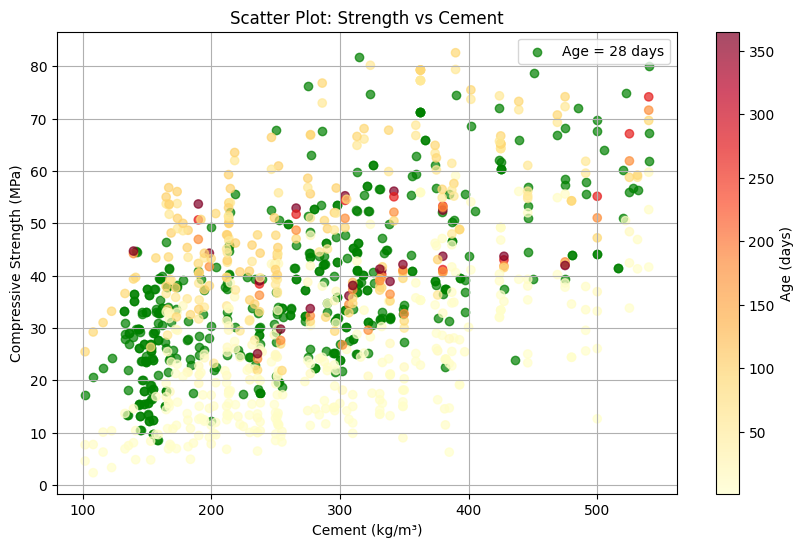

In [ ]:
# Définir l'âge spécial pour la différenciation
special_age = 28

# Tracer le nuage de points avec des couleurs différentes pour l'âge spécial et les autres âges
plt.figure(figsize=(10, 6))

# Tracé pour l'âge 28 (en vert)
subset_special = data[data['Age (day)'] == special_age]
plt.scatter(subset_special['Cement (kg/m³)'], subset_special['Strength (MPa)'],
            label=f'Age = {special_age} days', alpha=0.7, color='green')

# Tracé pour les autres âges (heatmap avec l'âge comme couleur démarrant par le jaune foncé)
other_ages = data[data['Age (day)'] != special_age]
plt.scatter(other_ages['Cement (kg/m³)'], other_ages['Strength (MPa)'],
            c=other_ages['Age (day)'], cmap='YlOrRd', alpha=0.7)

plt.title('Scatter Plot: Strength vs Cement')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.colorbar(label='Age (days)', orientation='vertical')
plt.show()

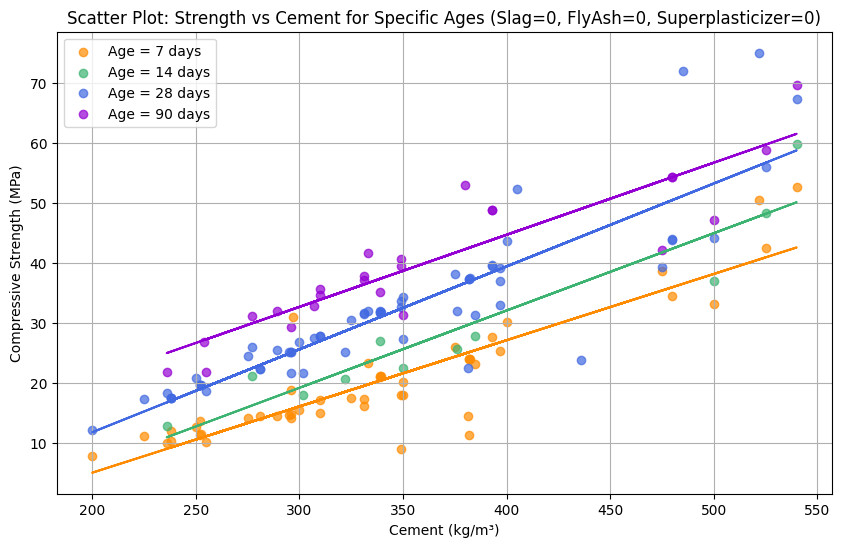

In [ ]:
# Définir les âges spécifiques (inclure 14 jours au lieu de 365 jours)
special_ages = [7, 14, 28, 90]

# Filtrer les données pour ne garder que les âges spécifiés et les conditions Slag=0, FlyAsh=0, Superplasticizer=0
filtered_data = data[
    (data['Age (day)'].isin(special_ages)) &
    (data['Slag (kg/m³)'] == 0) &
    (data['FlyAsh (kg/m³)'] == 0) &
    (data['Superplasticizer (kg/m³)'] == 0)
]

# Scatter plot avec différentes couleurs pour les âges spéciaux
plt.figure(figsize=(10, 6))
colors = ['darkorange', 'mediumseagreen', 'royalblue', 'darkviolet']

for age, color in zip(special_ages, colors):
    subset = filtered_data[filtered_data['Age (day)'] == age]
    plt.scatter(subset['Cement (kg/m³)'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7, color=color)

    # Calculer et tracer la ligne de tendance moyenne
    z = np.polyfit(subset['Cement (kg/m³)'], subset['Strength (MPa)'], 1)
    p = np.poly1d(z)
    plt.plot(subset['Cement (kg/m³)'], p(subset['Cement (kg/m³)']), color=color, linestyle='-')

plt.title('Scatter Plot: Strength vs Cement for Specific Ages (Slag=0, FlyAsh=0, Superplasticizer=0)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

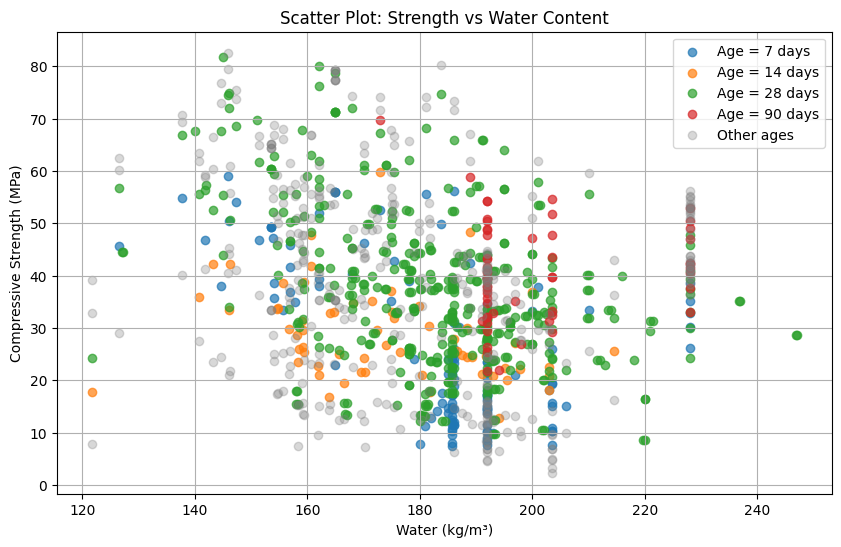

In [ ]:
# Define special ages to differentiate
special_ages = [7, 14, 28, 90]

# Scatter plot with different colors for special ages
plt.figure(figsize=(10, 6))
for age in special_ages:
    subset = data[data['Age (day)'] == age]
    plt.scatter(subset['Water (kg/m³)'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7)

# Points for other ages
other_ages = data[~data['Age (day)'].isin(special_ages)]
plt.scatter(other_ages['Water (kg/m³)'], other_ages['Strength (MPa)'],
            color='gray', label='Other ages', alpha=0.3)

plt.title('Scatter Plot: Strength vs Water Content')
plt.xlabel('Water (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

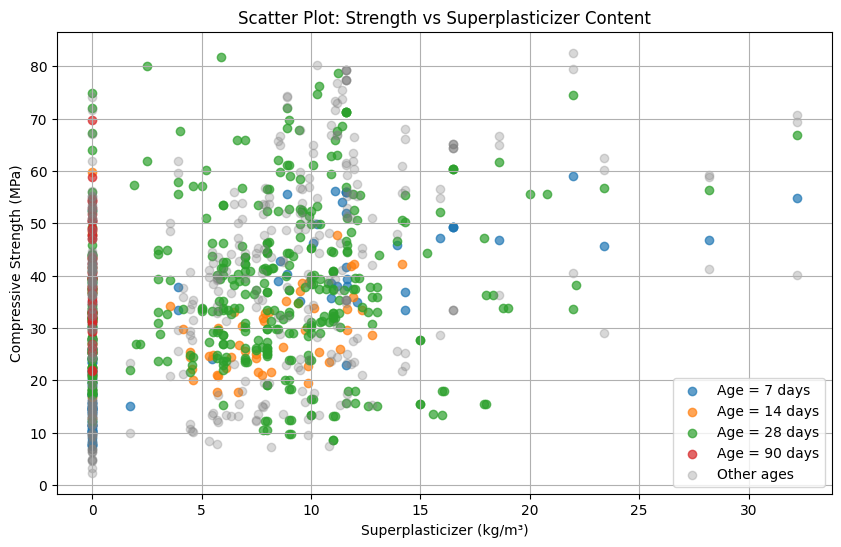

In [ ]:
# Define special ages to differentiate
special_ages = [7, 14, 28, 90]

# Scatter plot with different colors for special ages
plt.figure(figsize=(10, 6))
for age in special_ages:
    subset = data[data['Age (day)'] == age]
    plt.scatter(subset['Superplasticizer (kg/m³)'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7)

# Points for other ages
other_ages = data[~data['Age (day)'].isin(special_ages)]
plt.scatter(other_ages['Superplasticizer (kg/m³)'], other_ages['Strength (MPa)'],
            color='gray', label='Other ages', alpha=0.3)

plt.title('Scatter Plot: Strength vs Superplasticizer Content')
plt.xlabel('Superplasticizer (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

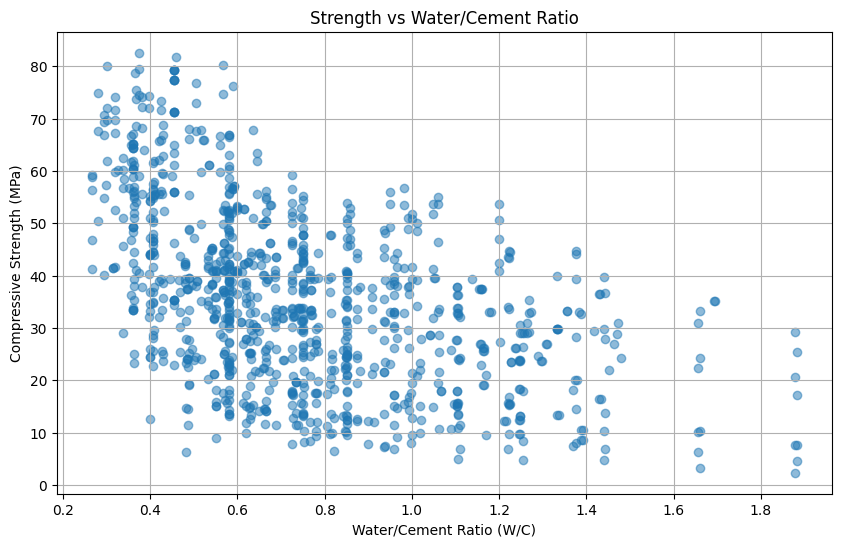

In [ ]:
# Tracer le scatter plot Strength vs W/C
plt.figure(figsize=(10, 6))
plt.scatter(data2['W/C'], data2['Strength (MPa)'], alpha=0.5)
plt.title('Strength vs Water/Cement Ratio')
plt.xlabel('Water/Cement Ratio (W/C)')
plt.ylabel('Compressive Strength (MPa)')
plt.grid(True)
plt.show()

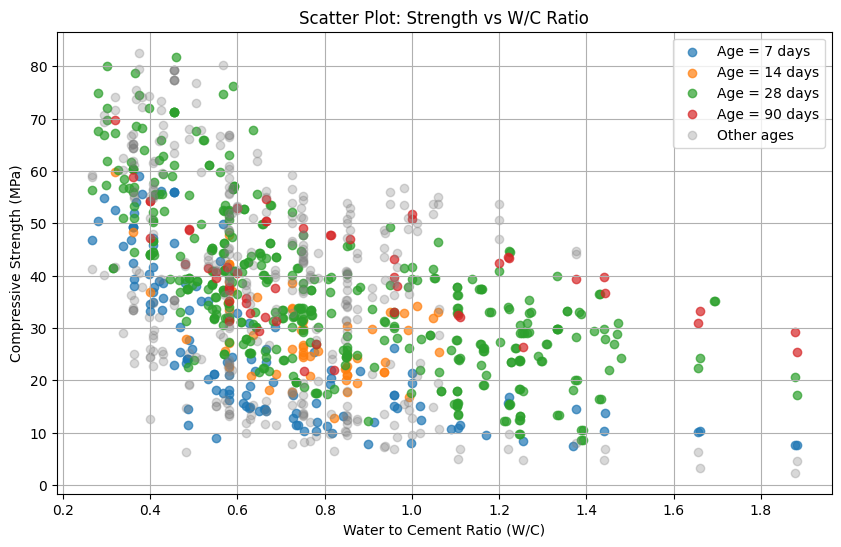

In [ ]:
# Créer une copie de la base de données
data2 = data.copy()

# Calculer les nouvelles colonnes
data2['W/C'] = data2['Water (kg/m³)'] / data2['Cement (kg/m³)']
data2['G/S'] = data2['CoarseAggr (kg/m³)'] / data2['FineAggr (kg/m³)']

# Insérer les nouvelles colonnes avant la colonne 'Strength'
strength_index = data2.columns.get_loc('Strength (MPa)')

# Réordonner les colonnes pour placer 'W/C' et 'G/S' avant 'Strength'
cols = data2.columns.tolist()
cols.insert(strength_index, cols.pop(cols.index('W/C')))
cols.insert(strength_index, cols.pop(cols.index('G/S')))

# Appliquer le nouvel ordre des colonnes à data2
data2 = data2[cols]


# Define special ages to differentiate
special_ages = [7, 14, 28, 90]

# Scatter plot with different colors for special ages
plt.figure(figsize=(10, 6))
for age in special_ages:
    subset = data2[data2['Age (day)'] == age]
    plt.scatter(subset['W/C'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7)

# Points for other ages
other_ages = data2[~data2['Age (day)'].isin(special_ages)]
plt.scatter(other_ages['W/C'], other_ages['Strength (MPa)'],
            color='gray', label='Other ages', alpha=0.3)

plt.title('Scatter Plot: Strength vs W/C Ratio')
plt.xlabel('Water to Cement Ratio (W/C)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Filtrer les données pour l'âge de 28 jours
filtered_data2 = data2[data2['Age (day)'] == 28]

# Calculer le ratio W/C
filtered_data2['W/C'] = filtered_data2['Water (kg/m³)'] / filtered_data2['Cement (kg/m³)']

# Scatter plot pour l'âge de 28 jours
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data2['W/C'], filtered_data2['Strength (MPa)'],
            color='blue', alpha=0.7)

# Ajuster une courbe polynomiale de degré 3
coefficients = np.polyfit(filtered_data2['W/C'], filtered_data2['Strength (MPa)'], 3)
polynomial = np.poly1d(coefficients)

# Définir la limite pour la courbe ajustée
limit = 1.515

# Générer des valeurs pour la courbe ajustée, mais seulement jusqu'à la limite
w_c_vals_poly = np.linspace(filtered_data2['W/C'].min(), limit, 100)
fitted_curve_poly = polynomial(w_c_vals_poly)

# Tracer la courbe polynomiale ajustée
plt.plot(w_c_vals_poly, fitted_curve_poly, color='red', linestyle='--')

# Ajouter une ligne horizontale (palier) après la limite
last_w_c_value = filtered_data2['W/C'].max()
last_strength = polynomial(limit)

# Générer des valeurs pour la partie horizontale de la courbe
w_c_vals_horizontal = np.linspace(limit, last_w_c_value, 100)
horizontal_line = np.full_like(w_c_vals_horizontal, last_strength)

# Tracer la partie horizontale
plt.plot(w_c_vals_horizontal, horizontal_line, color='red', linestyle='--')

plt.title('Scatter Plot: Strength vs Water to Cement Ratio (Age = 28 Days)')
plt.xlabel('Water to Cement Ratio (W/C)')
plt.ylabel('Compressive Strength (MPa)')
plt.grid(True)
plt.show()

<ipython-input-73-c62e29a87f8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['W/C'] = filtered_data2['Water (kg/m³)'] / filtered_data2['Cement (kg/m³)']


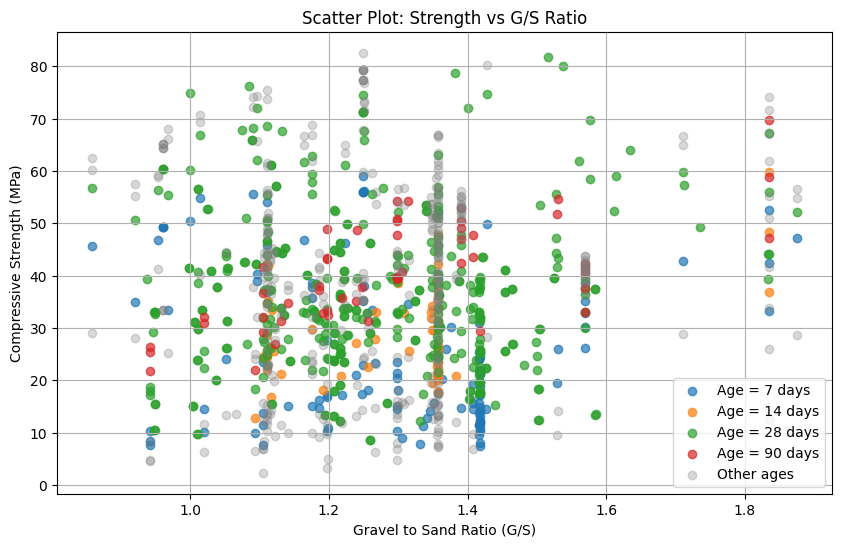

In [ ]:
# Define special ages to differentiate
special_ages = [7, 14, 28, 90]

# Scatter plot with different colors for special ages
plt.figure(figsize=(10, 6))
for age in special_ages:
    subset = data2[data2['Age (day)'] == age]
    plt.scatter(subset['G/S'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7)

# Points for other ages
other_ages = data2[~data2['Age (day)'].isin(special_ages)]
plt.scatter(other_ages['G/S'], other_ages['Strength (MPa)'],
            color='gray', label='Other ages', alpha=0.3)

plt.title('Scatter Plot: Strength vs G/S Ratio')
plt.xlabel('Gravel to Sand Ratio (G/S)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

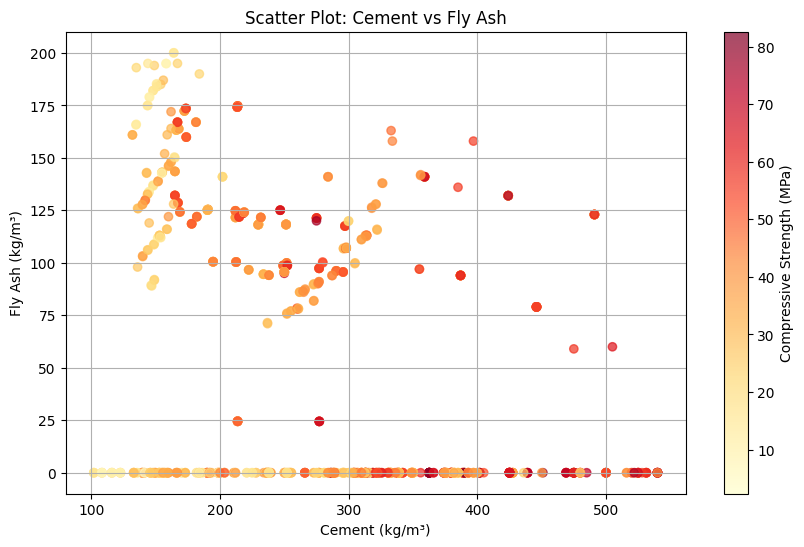

In [ ]:
# Tracer le nuage de points avec un dégradé de couleur pour la résistance
plt.figure(figsize=(10, 6))

plt.scatter(data['Cement (kg/m³)'], data['FlyAsh (kg/m³)'],
            c=data['Strength (MPa)'], cmap='YlOrRd', alpha=0.7)

plt.title('Scatter Plot: Cement vs Fly Ash')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Fly Ash (kg/m³)')
plt.colorbar(label='Compressive Strength (MPa)', orientation='vertical')
plt.grid(True)
plt.show()

# Filtrer les données pour l'âge égal à 28 jours
data_age_28 = data[data['Age (day)'] == 28]

# Tracer le nuage de points avec un dégradé de couleur pour la résistance
plt.figure(figsize=(10, 6))

plt.scatter(data_age_28['Cement (kg/m³)'], data_age_28['FlyAsh (kg/m³)'],
            c=data_age_28['Strength (MPa)'], cmap='YlOrRd', alpha=0.7)

plt.title('Scatter Plot: Cement vs Fly Ash (Age = 28 days)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Fly Ash (kg/m³)')
plt.colorbar(label='Compressive Strength (MPa)', orientation='vertical')
plt.grid(True)
plt.show()

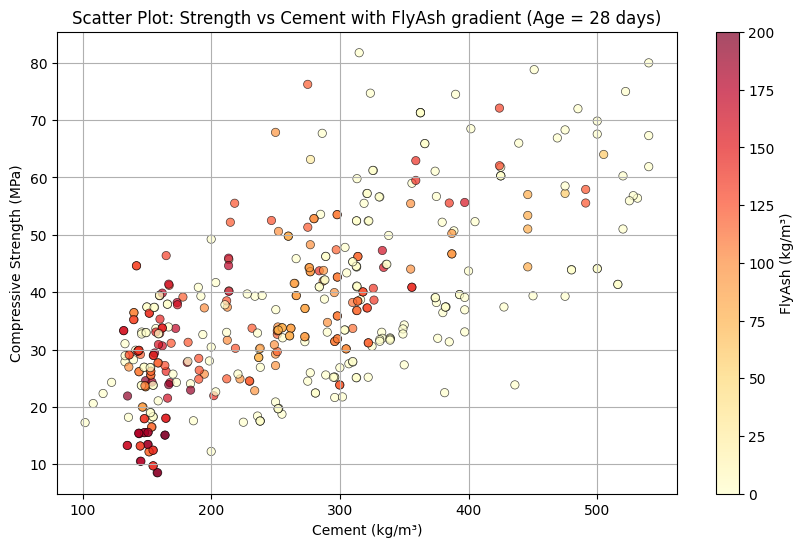

In [ ]:
# Filtrer les données pour age = 28
data_age_28 = data[data['Age (day)'] == 28]

# Tracer le nuage de points avec dégradation de couleur pour FlyAsh
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_age_28['Cement (kg/m³)'], data_age_28['Strength (MPa)'],
                      c=data_age_28['FlyAsh (kg/m³)'],
                      cmap='YlOrRd', alpha=0.7, edgecolors='k', linewidths=0.5)

plt.title('Scatter Plot: Strength vs Cement with FlyAsh gradient (Age = 28 days)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.colorbar(scatter, label='FlyAsh (kg/m³)', orientation='vertical')
plt.grid(True)
plt.show()

In [ ]:
# Filtrer les données pour l'âge égal à 28 jours
data_age_28 = data[data['Age (day)'] == 28]

# Tracer le nuage de points avec un dégradé de couleur pour la résistance
plt.figure(figsize=(10, 6))

plt.scatter(data_age_28['Cement (kg/m³)'], data_age_28['Slag (kg/m³)'],
            c=data_age_28['Strength (MPa)'], cmap='YlOrRd', alpha=0.7)

plt.title('Cement vs Slag (Age = 28 days)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Slag (kg/m³)')
plt.colorbar(label='Compressive Strength (MPa)', orientation='vertical')
plt.grid(True)
plt.show()

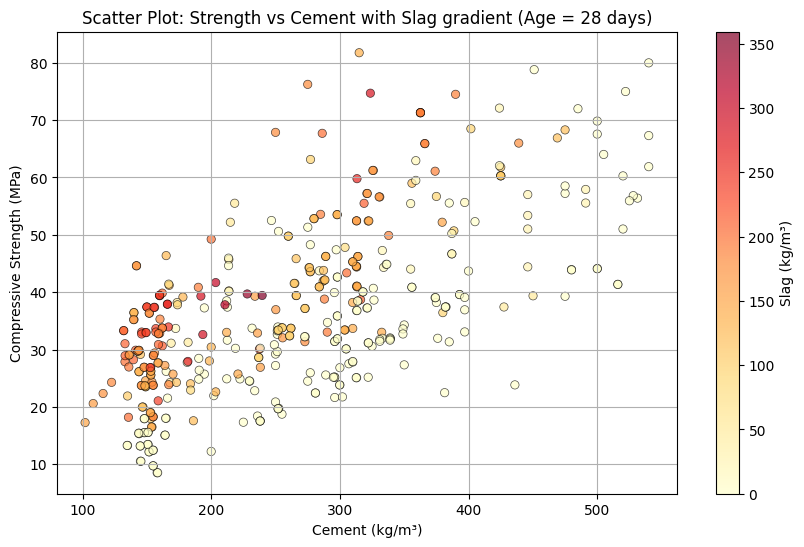

In [ ]:
# Filtrer les données pour age = 28
data_age_28 = data[data['Age (day)'] == 28]

# Tracer le nuage de points avec dégradation de couleur pour Slag
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_age_28['Cement (kg/m³)'], data_age_28['Strength (MPa)'],
                      c=data_age_28['Slag (kg/m³)'],
                      cmap='YlOrRd', alpha=0.7, edgecolors='k', linewidths=0.5)

plt.title('Scatter Plot: Strength vs Cement with Slag gradient (Age = 28 days)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.colorbar(scatter, label='Slag (kg/m³)', orientation='vertical')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.colors as mcolors
# Filtrer les données pour un âge de 28 jours et FlyAsh=0, Superplasticizer=0
filtered_data = data[
    (data['Age (day)'] == 28) &
    (data['FlyAsh (kg/m³)'] == 0) &
    (data['Superplasticizer (kg/m³)'] == 0)
]

# Définir les valeurs de Slag et les couleurs pour le dégradé
slag_values = filtered_data['Slag (kg/m³)'].unique()
cmap = plt.get_cmap('viridis')  # Utiliser une carte de couleurs pour le dégradé
norm = mcolors.Normalize(vmin=min(slag_values), vmax=max(slag_values))

# Scatter plot avec un dégradé de couleurs pour Slag
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    filtered_data['Cement (kg/m³)'],
    filtered_data['Strength (MPa)'],
    c=filtered_data['Slag (kg/m³)'],
    cmap=cmap,
    norm=norm,
    alpha=0.7
)

# Ajouter une barre de couleurs pour indiquer le dégradé de Slag
cbar = plt.colorbar(scatter)
cbar.set_label('Slag (kg/m³)')

plt.title('Compressive Strength vs Cement (Age=28 Days, FlyAsh=0, Superplasticizer=0)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.grid(True)
plt.show()

In [ ]:
# Définir les intervalles de résistance
bins = [0, 30, 50, 70, float('inf')]  # Les intervalles sont définis en MPa

# Ajouter une nouvelle colonne avec les catégories d'intervalle
data['Strength Category'] = pd.cut(data['Strength (MPa)'], bins=bins,
                                   labels=['<30 MPa', '30-50 MPa', '50-70 MPa', '>70 MPa'])

# Tracer des scatter plots pour chaque intervalle de résistance
plt.figure(figsize=(12, 8))

for category in data['Strength Category'].unique():
    subset = data[data['Strength Category'] == category]
    plt.scatter(subset['Cement (kg/m³)'], subset['Slag (kg/m³)'],
                label=category, alpha=0.7)

plt.title('Scatter Plot: Slag vs Cement by Strength Category')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Slag (kg/m³)')
plt.legend(title='Strength Category')
plt.grid(True)
plt.show()

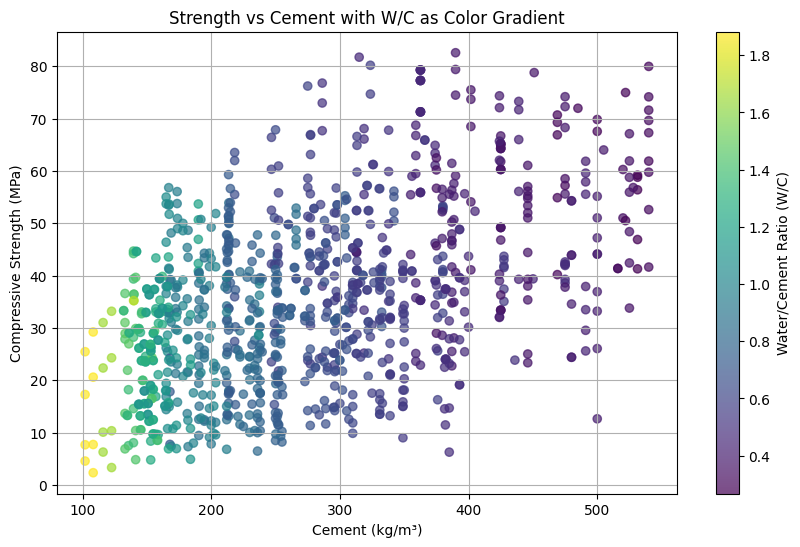

In [ ]:
# Tracer le scatter plot Strength vs Cement avec couleur dégradée représentant W/C
plt.figure(figsize=(10, 6))
sc = plt.scatter(data2['Cement (kg/m³)'], data2['Strength (MPa)'], c=data2['W/C'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Water/Cement Ratio (W/C)')
plt.title('Strength vs Cement with W/C as Color Gradient')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.grid(True)
plt.show()

# **Sensitivity Analysis**

In [86]:
# Séparer les features et la target
X = data.drop(columns=['Strength (MPa)'])
y = data['Strength (MPa)']

# Séparer la base de données en 80% train et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer les variables non normalisées
X_train_non_normalized = X_train.copy()
X_test_non_normalized = X_test.copy()

# Normaliser les données avec StandardScaler
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Convertir les données normalisées avec StandardScaler en DataFrame pour une manipulation plus facile
X_train_standard = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_test_standard = pd.DataFrame(X_test_standard, columns=X_test.columns)

# Normaliser les données avec MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Convertir les données normalisées avec MinMaxScaler en DataFrame pour une manipulation plus facile
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X_test.columns)

In [ ]:
fixed_params = {
    'hidden_layer_sizes': 58,
    'activation': 'tanh',
    'solver': 'sgd',
    'max_iter': 1000,
    'alpha': 0.0001
}
# Définir le modèle de régression MLP (Multi-layer Perceptron)
model = MLPRegressor(**fixed_params,random_state=42)

# Entraîner le modèle
model.fit(X_train_standard, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_test_standard = model.predict(X_test_standard)

# Calculez les métriques de performance
mae_test_standard = mean_absolute_error(y_test, y_pred_test_standard)
rmse_test_standard = mean_squared_error(y_test, y_pred_test_standard, squared=False)
r2_test_standard = r2_score(y_test, y_pred_test_standard)

# Faites des prédictions sur l'ensemble d'entraînement normalisé
y_pred_train_standard = model.predict(X_train_standard)

# Calculez les métriques de performance sur l'ensemble d'entraînement
mae_train_standard= mean_absolute_error(y_train, y_pred_train_standard)
rmse_train_standard = mean_squared_error(y_train, y_pred_train_standard, squared=False)
r2_train_standard = r2_score(y_train, y_pred_train_standard)

print("Performance sur l'ensemble de test:")
print("Mean Absolute Error (MAE):", mae_test_standard)
print("Root Mean Squared Error (RMSE):", rmse_test_standard)
print("R-squared (R²):", r2_test_standard)

print("\nPerformance sur l'ensemble d'entraînement:")
print("Mean Absolute Error (MAE):", mae_train_standard)
print("Root Mean Squared Error (RMSE):", rmse_train_standard)
print("R-squared (R²):", r2_train_standard)

In [ ]:
# Define parameters
alpha = 0.0001  # You can adjust this value as needed
solver = 'adam'
neurons_range = range(8, 101)
activations = ['identity', 'logistic', 'tanh', 'relu']

# Dictionary to store results
results = {act: [] for act in activations}

# Compute R² scores for each configuration
for activation in activations:
    for n_neurons in neurons_range:
        mlp = MLPRegressor(hidden_layer_sizes=(n_neurons,),
                           activation=activation,
                           solver=solver,
                           alpha=alpha,
                           max_iter=1000,
                           random_state=42)

        scores = cross_val_score(mlp, X_train_standard, y_train, cv=5, scoring='r2')
        results[activation].append(np.mean(scores))

# Plot the results
plt.figure(figsize=(12, 8))
for activation in activations:
    plt.plot(neurons_range, results[activation], label=activation, marker='o')

plt.xlabel('Number of Neurons')
plt.ylabel('Average R² (Cross-Validation)')
plt.title(f'R² vs Number of Neurons for Different Activation Functions\n(alpha={alpha}, solver={solver})')
plt.legend()
plt.grid(True)

# Add text with fixed parameters (solver and alpha) in the bottom right corner
plt.text(0.95, 0.1, f'solver: {solver}\nalpha: {alpha}',
         fontsize=12, color='black', ha='right', va='bottom', transform=plt.gca().transAxes)

# Save the figure as an image
plt.savefig('mlp_regressor_analysis.png', bbox_inches='tight')

plt.show()

# Print the best results for each activation function
for activation in activations:
    best_score = max(results[activation])
    best_neurons = neurons_range[results[activation].index(best_score)]
    print(f"Best R² for {activation}: {best_score:.4f} with {best_neurons} neurons")


In [ ]:
# Set parameters
alpha = 0.0001  # You can adjust this value as needed
solver = 'lbfgs'
neurons_range = range(1, 101)
activations = ['identity', 'logistic', 'tanh', 'relu']

# Dictionary to store results
results = {act: [] for act in activations}

# Calculate R² scores for each configuration
for activation in activations:
    for n_neurons in neurons_range:
        mlp = MLPRegressor(hidden_layer_sizes=(n_neurons,),
                           activation=activation,
                           solver=solver,
                           alpha=alpha,
                           max_iter=1000,
                           random_state=42)

        scores = cross_val_score(mlp, X_train_standard, y_train, cv=5, scoring='r2')
        results[activation].append(np.mean(scores))

# Plot the results
plt.figure(figsize=(12, 8))
for activation in activations:
    plt.plot(neurons_range, results[activation], label=activation, marker='o')

plt.xlabel('Number of neurons')
plt.ylabel('Mean R²')
plt.title(f'Mean R² vs. Number of Neurons for Different Activation Functions\n(alpha={alpha}, solver={solver})')
plt.legend()
plt.grid(True)

# Add text with fixed parameters (solver and alpha) in the bottom right corner
plt.text(0.95, 0.1, f'solver: {solver}\nalpha: {alpha}',
         fontsize=12, color='black', ha='right', va='bottom', transform=plt.gca().transAxes)

# Save the plot as a .jpg image
plt.savefig('mean_r2_vs_neurons.jpg', format='jpg')

plt.show()

# Display the best results for each activation function
for activation in activations:
    best_score = max(results[activation])
    best_neurons = neurons_range[results[activation].index(best_score)]
    print(f"Best R² for {activation}: {best_score:.4f} with {best_neurons} neurons")


In [ ]:
# Paramètres fixes
alpha = 0.0001  # Utilisez la valeur optimale trouvée précédemment
activation = 'relu'  # Utilisez la meilleure fonction d'activation trouvée
solver = 'lbfgs'
neurons_range = range(8, 51)  # Étendons la plage pour mieux voir l'overfitting

# Listes pour stocker les résultats
train_scores = []
test_scores = []
diff_scores = []

# Calculer les scores R² pour chaque nombre de neurones
for n_neurons in neurons_range:
    mlp = MLPRegressor(hidden_layer_sizes=(n_neurons,),
                       activation=activation,
                       solver=solver,
                       alpha=alpha,
                       max_iter=1000,
                       random_state=42)

    # Entraîner le modèle
    mlp.fit(X_train_standard, y_train)

    # Calculer R² pour l'ensemble d'entraînement
    y_train_pred = mlp.predict(X_train_standard)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Calculer R² pour l'ensemble de test
    y_test_pred = mlp.predict(X_test_standard)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

    # Calculer la différence entre les R² d'entraînement et de test
    diff_scores.append(train_r2 - test_r2)

# Tracer les résultats
plt.figure(figsize=(12, 8))

# Tracer les scores R² pour l'ensemble d'entraînement
plt.plot(neurons_range, train_scores, label='Ensemble d\'entraînement', marker='o')

# Tracer les scores R² pour l'ensemble de test
plt.plot(neurons_range, test_scores, label='Ensemble de test', marker='s')

# Tracer la différence entre les scores R²
plt.plot(neurons_range, diff_scores, label='Différence entre train et test', marker='x', linestyle='--')

plt.xlabel('Nombre de neurones')
plt.ylabel('R²')
plt.title(f'R² en fonction du nombre de neurones\n(alpha={alpha}, activation={activation}, solver={solver})')
plt.legend()
plt.grid(True)
plt.show()

# Trouver le nombre optimal de neurones
optimal_neurons = neurons_range[np.argmax(test_scores)]
print(f"Nombre optimal de neurones : {optimal_neurons}")
print(f"Meilleur R² sur l'ensemble de test : {max(test_scores):.4f}")

# Afficher la différence maximale entre les R² d'entraînement et de test
max_diff = max(diff_scores)
print(f"Différence maximale entre train et test R² : {max_diff:.4f}")

In [ ]:
# Set parameters
alpha = 0.0001  # You can adjust this value as needed
solver = 'sgd'
neurons_range = range(1, 101)
activations = ['identity', 'logistic', 'tanh', 'relu']

# Dictionary to store results
results = {act: [] for act in activations}

# Calculate R² scores for each configuration
for activation in activations:
    for n_neurons in neurons_range:
        mlp = MLPRegressor(hidden_layer_sizes=(n_neurons,),
                           activation=activation,
                           solver=solver,
                           alpha=alpha,
                           max_iter=1000,
                           random_state=42)

        scores = cross_val_score(mlp, X_train_standard, y_train, cv=5, scoring='r2')
        results[activation].append(np.mean(scores))

# Plot the results
plt.figure(figsize=(12, 8))
for activation in activations:
    plt.plot(neurons_range, results[activation], label=activation, marker='o')

plt.xlabel('Number of neurons')
plt.ylabel('Mean R² (cross-validation)')
plt.title(f'Mean R² vs. Number of Neurons for Different Activation Functions\n(alpha={alpha}, solver={solver})')
plt.legend()
plt.grid(True)

# Add text with fixed parameters (solver and alpha) in the bottom right corner
plt.text(0.95, 0.1, f'solver: {solver}\nalpha: {alpha}',
         fontsize=12, color='black', ha='right', va='bottom', transform=plt.gca().transAxes)

# Save the plot as a .jpg image
plt.savefig('mean_r2_vs_neurons_sgd.jpg', format='jpg')

plt.show()

# Display the best results for each activation function
for activation in activations:
    best_score = max(results[activation])
    best_neurons = neurons_range[results[activation].index(best_score)]
    print(f"Best R² for {activation}: {best_score:.4f} with {best_neurons} neurons")

In [ ]:
# Paramètres fixes
alpha = 0.0001
activation = 'tanh'
solver = 'sgd'
neurons_range = range(1, 101)  # De 1 à 100 neurones

# Listes pour stocker les résultats
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []

# Calculer les scores R² et RMSE pour chaque nombre de neurones
for n_neurons in neurons_range:
    mlp = MLPRegressor(hidden_layer_sizes=(n_neurons,),
                       activation=activation,
                       solver=solver,
                       alpha=alpha,
                       max_iter=1000,
                       random_state=42)

    mlp.fit(X_train_standard, y_train)

    y_train_pred = mlp.predict(X_train_standard)
    y_test_pred = mlp.predict(X_test_standard)

    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Créer la figure
fig, ax1 = plt.subplots(figsize=(12, 8))

# Tracer R²
ax1.plot(neurons_range, train_scores, label='R² Entraînement', marker='o')
ax1.plot(neurons_range, test_scores, label='R² Test', marker='s')
ax1.set_xlabel('Nombre de neurones')
ax1.set_ylabel('R²')
ax1.legend(loc='upper left')
ax1.grid(True)

# Créer un deuxième axe y pour le RMSE
ax2 = ax1.twinx()

# Tracer RMSE comme des barres
bar_width = 0.4
ax2.bar(np.array(neurons_range) - bar_width/2, train_rmse, bar_width, alpha=0.3, color='blue', label='RMSE Entraînement')
ax2.bar(np.array(neurons_range) + bar_width/2, test_rmse, bar_width, alpha=0.3, color='orange', label='RMSE Test')
ax2.set_ylabel('RMSE')

# Ajuster les limites de l'axe y du RMSE
max_rmse = max(max(train_rmse), max(test_rmse))
ax2.set_ylim(0, max_rmse * 1.1)

# Ajouter une légende pour le RMSE
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title(f'R² et RMSE en fonction du nombre de neurones\n(alpha={alpha}, activation={activation}, solver={solver})')
plt.tight_layout()
plt.show()

# Trouver le nombre optimal de neurones
optimal_neurons = neurons_range[np.argmax(test_scores)]
print(f"Nombre optimal de neurones : {optimal_neurons}")
print(f"Meilleur R² sur l'ensemble de test : {max(test_scores):.4f}")
print(f"RMSE correspondant sur l'ensemble de test : {test_rmse[np.argmax(test_scores)]:.4f}")

In [ ]:
# Set parameters
alpha = 0.0001
solver = 'sgd'
neurons_range = range(1, 20)
activations = ['identity', 'logistic', 'tanh', 'relu']

# Placeholder for storing results
results = {act: [] for act in activations}
tanh_results = {
    'train_scores': [],
    'test_scores': [],
    'train_rmse': [],
    'test_rmse': []
}

# Calculate R² scores for each configuration
for activation in activations:
    for n_neurons in neurons_range:
        mlp = MLPRegressor(hidden_layer_sizes=(n_neurons,),
                           activation=activation,
                           solver=solver,
                           alpha=alpha,
                           max_iter=1000,
                           random_state=42)

        if activation == 'tanh':
            mlp.fit(X_train_standard, y_train)
            y_train_pred = mlp.predict(X_train_standard)
            y_test_pred = mlp.predict(X_test_standard)

            tanh_results['train_scores'].append(r2_score(y_train, y_train_pred))
            tanh_results['test_scores'].append(r2_score(y_test, y_test_pred))
            tanh_results['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            tanh_results['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

        scores = cross_val_score(mlp, X_train_standard, y_train, cv=5, scoring='r2')
        results[activation].append(np.mean(scores))

# Plot the results for different activation functions
plt.figure(figsize=(12, 8))
for activation in activations:
    plt.plot(neurons_range, results[activation], label=activation, marker='o')

plt.xlabel('Number of neurons')
plt.ylabel('Mean R² (cross-validation)')
plt.title(f'Mean R² vs. Number of Neurons for Different Activation Functions\n(alpha={alpha}, solver={solver})')
plt.legend()
plt.grid(True)
plt.show()

# Display the best results for each activation function
for activation in activations:
    best_score = max(results[activation])
    best_neurons = neurons_range[results[activation].index(best_score)]
    print(f"Best R² for {activation}: {best_score:.4f} with {best_neurons} neurons")

# Plot detailed results for 'tanh' activation function
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot R²
ax1.plot(neurons_range, tanh_results['train_scores'], label='R² Training', marker='o')
ax1.plot(neurons_range, tanh_results['test_scores'], label='R² Test', marker='s')
ax1.set_xlabel('Number of neurons')
ax1.set_ylabel('R²')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis for RMSE
ax2 = ax1.twinx()

# Plot RMSE as bars
bar_width = 0.4
ax2.bar(np.array(neurons_range) - bar_width/2, tanh_results['train_rmse'], bar_width, alpha=0.3, color='blue', label='RMSE Training')
ax2.bar(np.array(neurons_range) + bar_width/2, tanh_results['test_rmse'], bar_width, alpha=0.3, color='orange', label='RMSE Test')
ax2.set_ylabel('RMSE')

# Adjust RMSE y-axis limits
max_rmse = max(max(tanh_results['train_rmse']), max(tanh_results['test_rmse']))
ax2.set_ylim(0, max_rmse * 1.1)

# Add RMSE legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title(f'R² and RMSE vs. Number of Neurons\n(alpha={alpha}, activation={activation}, solver={solver})')
plt.tight_layout()
plt.show()

# Find the optimal number of neurons for 'tanh'
optimal_neurons = neurons_range[np.argmax(tanh_results['test_scores'])]
print(f"Optimal number of neurons: {optimal_neurons}")
print(f"Best R² on test set: {max(tanh_results['test_scores']):.4f}")
print(f"Corresponding RMSE on test set: {tanh_results['test_rmse'][np.argmax(tanh_results['test_scores'])]:.4f}")


In [ ]:
# Définir les paramètres fixes du modèle
fixed_params = {
    'activation': 'tanh',
    'solver': 'sgd',
    'max_iter': 1000,
    'alpha': 0.0001,
    'random_state': 42
}

# Tailles des couches cachées à comparer
hidden_layer_sizes = [16, 58]

# Dictionnaire pour stocker les résultats
results = {}

for size in hidden_layer_sizes:
    # Mettre à jour les paramètres avec la taille de la couche cachée
    params = fixed_params.copy()
    params['hidden_layer_sizes'] = size

    # Définir le modèle de régression MLP (Multi-layer Perceptron)
    model = MLPRegressor(**params)

    # Entraîner le modèle
    model.fit(X_train_standard, y_train)

    # Faire des prédictions sur l'ensemble de test
    y_pred_test_standard = model.predict(X_test_standard)

    # Calculez les métriques de performance pour l'ensemble de test
    mae_test_standard = mean_absolute_error(y_test, y_pred_test_standard)
    rmse_test_standard = mean_squared_error(y_test, y_pred_test_standard, squared=False)
    r2_test_standard = r2_score(y_test, y_pred_test_standard)

    # Faire des prédictions sur l'ensemble d'entraînement
    y_pred_train_standard = model.predict(X_train_standard)

    # Calculez les métriques de performance pour l'ensemble d'entraînement
    mae_train_standard = mean_absolute_error(y_train, y_pred_train_standard)
    rmse_train_standard = mean_squared_error(y_train, y_pred_train_standard, squared=False)
    r2_train_standard = r2_score(y_train, y_pred_train_standard)

    # Calcul des différences entre ensemble d'entraînement et ensemble de test
    diff_mae = mae_train_standard - mae_test_standard
    diff_rmse = rmse_train_standard - rmse_test_standard
    diff_r2 = r2_train_standard - r2_test_standard

    # Stocker les résultats
    results[size] = {
        'mae_train': mae_train_standard,
        'rmse_train': rmse_train_standard,
        'r2_train': r2_train_standard,
        'mae_test': mae_test_standard,
        'rmse_test': rmse_test_standard,
        'r2_test': r2_test_standard,
        'diff_mae': diff_mae,
        'diff_rmse': diff_rmse,
        'diff_r2': diff_r2
    }

# Affichage des résultats
for size in hidden_layer_sizes:
    print(f"\nPerformance du modèle avec hidden_layer_sizes={size}:")
    print("Ensemble de test:")
    print(f"Mean Absolute Error (MAE): {results[size]['mae_test']:.4f}")
    print(f"Root Mean Squared Error (RMSE): {results[size]['rmse_test']:.4f}")
    print(f"R-squared (R²): {results[size]['r2_test']:.4f}")

    print("\nEnsemble d'entraînement:")
    print(f"Mean Absolute Error (MAE): {results[size]['mae_train']:.4f}")
    print(f"Root Mean Squared Error (RMSE): {results[size]['rmse_train']:.4f}")
    print(f"R-squared (R²): {results[size]['r2_train']:.4f}")

    print("\nDifférences entre ensemble d'entraînement et ensemble de test:")
    print(f"Difference MAE: {results[size]['diff_mae']:.4f}")
    print(f"Difference RMSE: {results[size]['diff_rmse']:.4f}")
    print(f"Difference R²: {results[size]['diff_r2']:.4f}")

# Visualisation des résultats
metrics = ['MAE', 'RMSE', 'R²']
colors = ['b', 'g', 'r']
bar_width = 0.25

train_scores_16 = [results[16]['mae_train'], results[16]['rmse_train'], results[16]['r2_train']]
test_scores_16 = [results[16]['mae_test'], results[16]['rmse_test'], results[16]['r2_test']]
diff_scores_16 = [results[16]['diff_mae'], results[16]['diff_rmse'], results[16]['diff_r2']]

train_scores_58 = [results[58]['mae_train'], results[58]['rmse_train'], results[58]['r2_train']]
test_scores_58 = [results[58]['mae_test'], results[58]['rmse_test'], results[58]['r2_test']]
diff_scores_58 = [results[58]['diff_mae'], results[58]['diff_rmse'], results[58]['diff_r2']]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Modèle avec 16 neurones
axes[0].bar(np.arange(len(metrics)), train_scores_16, bar_width, label='Train', color=colors[0])
axes[0].bar(np.arange(len(metrics)) + bar_width, test_scores_16, bar_width, label='Test', color=colors[1])
axes[0].bar(np.arange(len(metrics)) + 2 * bar_width, diff_scores_16, bar_width, label='Difference', color=colors[2])

axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Scores')
axes[0].set_title('Performance Metrics Comparison for Model with 16 Neurons')
axes[0].set_xticks(np.arange(len(metrics)) + bar_width)
axes[0].set_xticklabels(metrics)
axes[0].legend()

# Modèle avec 58 neurones
axes[1].bar(np.arange(len(metrics)), train_scores_58, bar_width, label='Train', color=colors[0])
axes[1].bar(np.arange(len(metrics)) + bar_width, test_scores_58, bar_width, label='Test', color=colors[1])
axes[1].bar(np.arange(len(metrics)) + 2 * bar_width, diff_scores_58, bar_width, label='Difference', color=colors[2])

axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Scores')
axes[1].set_title('Performance Metrics Comparison for Model with 58 Neurons')
axes[1].set_xticks(np.arange(len(metrics)) + bar_width)
axes[1].set_xticklabels(metrics)
axes[1].legend()

plt.tight_layout()
plt.show()

# *BUILDING MODELS*

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#load the data
dataset=pd.read_excel("Concrete_Data.xls")
dataset.head()
#renaming all featurses
dataset.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']
dataset.head()
x = dataset.drop('strength', axis=1)  # Features (independent variables)
y = dataset['strength']  # Target variable (dependent variable)
# Divisez les données en ensembles de formation et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
fixed_params = {
    'hidden_layer_sizes': 16,
    'activation': 'tanh',
    'solver': 'sgd',
    'max_iter': 5000,
    'alpha': 0.0001
}
# Définir le modèle de régression MLP (Multi-layer Perceptron)
model = MLPRegressor(**fixed_params,random_state=42)

# Entraîner le modèle
model.fit(x_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_test = model.predict(x_test_scaled)

# Calculez les métriques de performance
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)

# Faites des prédictions sur l'ensemble d'entraînement normalisé
y_pred_train = model.predict(x_train_scaled)

# Calculez les métriques de performance sur l'ensemble d'entraînement
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

print("Performance sur l'ensemble de test:")
print("Mean Absolute Error (MAE):", mae_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R²):", r2_test)

print("\nPerformance sur l'ensemble d'entraînement:")
print("Mean Absolute Error (MAE):", mae_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R-squared (R²):", r2_train)





# Plot pour l'ensemble d'entraînement
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_pred_train, color='blue', label='Entraînement')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', lw=2, label='X=Y')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title("Performance du Modèle - Ensemble d'Entraînement")
plt.legend()
plt.grid(True)
plt.show()

# Plot pour l'ensemble de test
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, color='green', label='Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='X=Y')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title("Performance du Modèle - Ensemble de Test")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Supposons que vous ayez déjà les prédictions et les valeurs réelles pour l'entraînement et le test
# y_train, y_pred_train, y_test, y_pred_test

# Calcul des valeurs de R²
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Plot pour l'ensemble d'entraînement et de test
plt.figure(figsize=(10, 5))

# Entraînement
plt.scatter(y_train, y_pred_train, color='blue', label=f'Train (R² = {r2_train:.3f})')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', lw=2)

# Test
plt.scatter(y_test, y_pred_test, color='green', label=f'Test (R² = {r2_test:.3f})')

plt.xlabel('True Values', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Predicted Values', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.title("Model Performance - Training and Test Set", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Charger les données
data = pd.read_excel("Concrete_Data.xls")

# Renommer les colonnes
data.columns = ['cement', 'blastFurnace', 'flyAsh', 'water', 'superplasticizer', 'courseAggregate', 'fineaggregate', 'age', 'strength']

# Séparer les données en caractéristiques et cible
X = data.drop(["strength"], axis=1)
Y = data["strength"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Standardisation des données
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Définir et entraîner le modèle MLP
model = MLPRegressor(hidden_layer_sizes=16, activation='tanh', solver='sgd', max_iter=5000, alpha=0.0001, random_state=42)
model.fit(X_train_standardized, Y_train)

# Faire des prédictions sur l'ensemble de test
Y_pred_test = model.predict(X_test_standardized)

# Calculer les erreurs de prédiction
errors = Y_test - Y_pred_test

# Créer le graphique
plt.figure(figsize=(14, 7))

# Courbes des valeurs prédites et réelles
plt.plot(Y_test.values, label='Valeurs Réelles', color='blue', linestyle='-', marker='o', markersize=5)
plt.plot(Y_pred_test, label='Valeurs Prédites', color='red', linestyle='-', marker='x', markersize=5)

# Ajouter l'histogramme des erreurs de prédiction avec ligne horizontale
plt.bar(range(len(errors)), errors, color='gray', edgecolor='black', alpha=0.5, label='Erreur de Prédiction')
plt.axhline(y=0, color='black', linestyle='--', label='Erreur Nulle')

# Ajouter des labels et une légende
plt.xlabel('Index des Points de Test')
plt.ylabel('Valeur')
plt.title('Valeurs Réelles vs Valeurs Prédites avec Erreurs de Prédiction')
plt.legend()
plt.grid(True)

# Afficher les erreurs pour chaque point
for i in range(len(errors)):
    plt.text(i, errors.iloc[i], f'{errors.iloc[i]:.2f}', fontsize=8, ha='center', va='bottom')

plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Charger les données
data = pd.read_excel("Concrete_Data.xls")

# Renommer les colonnes
data.columns = ['cement', 'blastFurnace', 'flyAsh', 'water', 'superplasticizer', 'courseAggregate', 'fineaggregate', 'age', 'strength']

# Séparer les données en caractéristiques et cible
X = data.drop(["strength"], axis=1)
Y = data["strength"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Standardisation des données
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Définir et entraîner le modèle MLP
model = MLPRegressor(hidden_layer_sizes=16, activation='tanh', solver='sgd', max_iter=5000, alpha=0.0001, random_state=42)
model.fit(X_train_standardized, Y_train)

# Faire des prédictions sur l'ensemble de test
Y_pred_test = model.predict(X_test_standardized)

# Calculer les erreurs de prédiction
errors = Y_test - Y_pred_test

# Créer le graphique
plt.figure(figsize=(14, 7))

# Courbes des valeurs prédites et réelles
plt.plot(Y_test.values, label='Valeurs Réelles', color='blue', linestyle='-', marker='o', markersize=5)
plt.plot(Y_pred_test, label='Valeurs Prédites', color='red', linestyle='-', marker='x', markersize=5)

# Ajouter l'histogramme des erreurs de prédiction avec ligne horizontale
plt.bar(range(len(errors)), errors, color='gray', edgecolor='black', alpha=0.5, label='Erreur de Prédiction')
plt.axhline(y=0, color='black', linestyle='--', label='Erreur Nulle')

# Ajouter des labels et une légende
plt.xlabel('Index des Points de Test')
plt.ylabel('Valeur')
plt.title('Valeurs Réelles vs Valeurs Prédites avec Erreurs de Prédiction')
plt.legend()
plt.grid(True)

# Supprimer les annotations des erreurs pour une meilleure visibilité
# Ajouter une ligne horizontale pour l'erreur nulle
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

# Afficher les erreurs dans un tableau
error_df = pd.DataFrame({
    'Index': range(len(errors)),
    'Valeur Réelle': Y_test,
    'Valeur Prédite': Y_pred_test,
    'Erreur': errors
})

print("Tableau des Erreurs de Prédiction:")
print(error_df.head())


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from matplotlib.lines import Line2D

# Load the data
data = pd.read_excel("Concrete_Data.xls")

# Rename the columns
data.columns = ['cement', 'blastFurnace', 'flyAsh', 'water', 'superplasticizer', 'courseAggregate', 'fineaggregate', 'age', 'strength']

# Separate features and target
X = data.drop(["strength"], axis=1)
Y = data["strength"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Define and train the MLP model
model = MLPRegressor(hidden_layer_sizes=16, activation='tanh', solver='sgd', max_iter=5000, alpha=0.0001, random_state=42)
model.fit(X_train_standardized, Y_train)

# Make predictions on the test set
Y_pred_test = model.predict(X_test_standardized)

# Calculate prediction errors
errors = Y_test - Y_pred_test

# Calculate absolute errors
abs_errors = np.abs(errors)

# Calculate mean absolute errors for each interval
mean_abs_error_low = abs_errors[Y_test < 20].mean()
mean_abs_error_mid = abs_errors[(Y_test >= 20) & (Y_test <= 40)].mean()
mean_abs_error_high = abs_errors[Y_test > 40].mean()

# Create the plot
plt.figure(figsize=(14, 7))

# Plot actual and predicted values
plt.plot(Y_test.values, label='Actual Values', color='blue', linestyle='-', marker='o', markersize=5)
plt.plot(Y_pred_test, label='Predicted Values', color='red', linestyle='-', marker='x', markersize=5)

# Add the prediction error histogram with different colors for intervals
colors = np.where(Y_test < 20, 'purple', np.where(Y_test <= 40, 'orange', 'cyan'))

# Add the prediction error histogram
bars = plt.bar(range(len(errors)), errors, color=colors, edgecolor='black', alpha=0.5, label='Prediction Error')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Error')

# Add labels and legend
plt.xlabel('Test Points Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values with Prediction Errors')

# Create custom legend elements for colors
legend_elements = [
    Line2D([0], [0], color='blue', linestyle='-', marker='o', markersize=5, label='Actual Values'),
    Line2D([0], [0], color='red', linestyle='-', marker='x', markersize=5, label='Predicted Values'),
    Line2D([0], [0], color='purple', lw=4, label=f'Error (<20 MPa): Mean {mean_abs_error_low:.2f}'),
    Line2D([0], [0], color='orange', lw=4, label=f'Error (20-40 MPa): Mean {mean_abs_error_mid:.2f}'),
    Line2D([0], [0], color='cyan', lw=4, label=f'Error (>40 MPa): Mean {mean_abs_error_high:.2f}')
]

plt.legend(handles=legend_elements)
plt.grid(True)

# Create a DataFrame for the mean errors
error_summary = pd.DataFrame({
    'Strength Interval': ['<20 MPa', '20-40 MPa', '>40 MPa'],
    'Mean Absolute Error': [mean_abs_error_low, mean_abs_error_mid, mean_abs_error_high]
})

print("Summary of Mean Absolute Errors:")
print(error_summary)

plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Charger les données
data = pd.read_excel("Concrete_Data.xls")

# Renommer les colonnes
data.columns = ['cement', 'blastFurnace', 'flyAsh', 'water', 'superplasticizer', 'courseAggregate', 'fineaggregate', 'age', 'strength']

# Séparer les données en caractéristiques et cible
X = data.drop(["strength"], axis=1)
Y = data["strength"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Standardisation des données
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Définir et entraîner le modèle MLP
model = MLPRegressor(hidden_layer_sizes=16, activation='tanh', solver='sgd', max_iter=5000, alpha=0.0001, random_state=42)
model.fit(X_train_standardized, Y_train)

# Faire des prédictions sur l'ensemble de test
Y_pred_test = model.predict(X_test_standardized)

# Importance des caractéristiques par permutation
result = permutation_importance(model, X_test_standardized, Y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

# Extraire les résultats
feature_importances = result.importances_mean
features = X.columns

# Calculer les importances en pourcentage
total_importance = np.sum(feature_importances)
feature_importances_percent = (feature_importances / total_importance) * 100

# Trier les résultats
indices = np.argsort(feature_importances_percent)[::-1]

# Créer une colormap personnalisée
def custom_colormap():
    colors = ["lightblue", "blue"]  # Couleurs pour la dégradation
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_blue", colors)
    return cmap

# Créer le graphique
plt.figure(figsize=(12, 10))
plt.title("Feature Importance by Permutation (Percentage)")

# Créer une colormap personnalisée
cmap = custom_colormap()
norm = plt.Normalize(vmin=0, vmax=max(feature_importances_percent))

# Ajouter les barres horizontales avec dégradé
bars = plt.barh(range(X.shape[1]), feature_importances_percent[indices], color=cmap(norm(feature_importances_percent[indices])), align="center")
plt.yticks(range(X.shape[1]), features[indices])
plt.xlim([0, 50])
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les caractéristiques les plus importantes en haut

# Ajouter une barre de couleur
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, orientation='horizontal', label='Importance (%)')

plt.show()

# Afficher les importances en pourcentage
for feature, importance in zip(features[indices], feature_importances_percent[indices]):
    print(f'{feature}: {importance:.2f}%')


In [ ]:
import matplotlib.pyplot as plt

# Calculer la sensibilité
def calculate_sensitivity(model, X, y, feature_names):
    sensitivities = []
    base_preds = model.predict(X)
    base_error = mean_absolute_error(y, base_preds)

    for i, feature in enumerate(feature_names):
        X_modified = X.copy()
        X_modified[:, i] += X[:, i].std()  # Perturbation de la caractéristique
        modified_preds = model.predict(X_modified)
        modified_error = mean_absolute_error(y, modified_preds)
        sensitivity = (modified_error - base_error) / base_error
        sensitivities.append(sensitivity)

    sensitivity_df = pd.DataFrame({
        'Feature': feature_names,
        'Sensitivity (%)': 100 * np.array(sensitivities)
    }).sort_values(by='Sensitivity (%)', ascending=False)

    return sensitivity_df

# Calculer la sensibilité des caractéristiques
sensitivity_df = calculate_sensitivity(model, X_test_standardized, Y_test, X.columns)

# Tracer le graphique de sensibilité
plt.figure(figsize=(10, 8))
plt.barh(sensitivity_df['Feature'], sensitivity_df['Sensitivity (%)'], color='teal')
plt.xlabel('Sensitivity (%)')
plt.ylabel('Feature')
plt.title('Feature Sensitivity Analysis')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Data from the table
metrics = ['MAE', 'RMSE', 'R²']
models = ['DT', 'SVM', 'ANN_MLP', 'RF', 'XGBoost']
values = {
    'MAE': [4.636, 4.473, 3.648, 3.358, 3.231],
    'RMSE': [7.272, 6.714, 5.13, 5.058, 4.746],
    'R²': [0.797, 0.827, 0.897, 0.902, 0.913]
}

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))

for i, metric in enumerate(metrics):
    values_list = values[metric]

    # Number of variables (i.e., models)
    num_vars = len(models)

    # Compute angle of each axis
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # To complete the circle

    # Create the radar chart in the subplot
    ax = axs[i]

    # Draw one axe per variable and add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(models)

    # Draw y-labels (scaled according to metric range)
    if metric == 'R²':
        yticks = np.arange(0, 1.1, step=0.2)
        ax.set_yticks(yticks)
        ax.set_yticklabels([f'{i:.1f}' for i in yticks], color="grey", size=7)
        ax.set_ylim(0, 1)
    else:
        max_value = max(values_list)
        yticks = np.arange(0, max_value + max_value/4, step=max_value/4)
        ax.set_yticks(yticks)
        ax.set_yticklabels([f'{round(i, 2)}' for i in yticks], color="grey", size=7)
        ax.set_ylim(0, max_value)

    # Plot data
    values_list += values_list[:1]  # To complete the circle
    ax.plot(angles, values_list, linewidth=2, linestyle='solid', label=metric)
    ax.fill(angles, values_list, 'b', alpha=0.1)

    # Add a title
    ax.set_title(f' {metric}', size=15, color='blue', y=1.1)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('/mnt/data/radar_charts_side_by_side_fixed.png')
plt.show()
